Imports

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
dataset, dataset_info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files = True, split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incomplete9RH296/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


Split Dataset

In [ ]:
def split(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATASET_SIZE = dataset_info.splits['train'].num_examples
  train_size = int(TRAIN_RATIO * DATASET_SIZE)
  val_size = int(VAL_RATIO * DATASET_SIZE)
  test_size = DATASET_SIZE - train_size - val_size

  train_dataset = dataset.take(train_size)
  val_test_dataset = dataset.skip(train_size)
  val_dataset = val_test_dataset.take(val_size)
  test_dataset = val_test_dataset.skip(val_size)

  return train_dataset, val_dataset, test_dataset

In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

train_dataset, val_dataset, test_dataset = split(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO)

Visualizing the Dataset

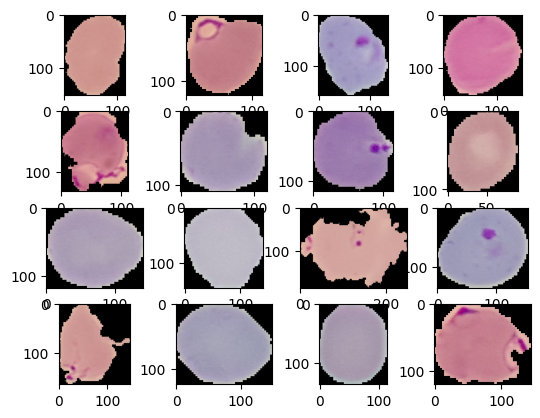

In [ ]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(image)

Data Preprocessing

In [ ]:
IM_SIZE = 224

def normalize(image, label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0, label


In [ ]:
train_dataset = train_dataset.map(normalize)
val_dataset = val_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [ ]:
for image, label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

Model Architecture

In [ ]:
def create_model():

  model = tf.keras.models.Sequential([

      InputLayer(input_shape = (IM_SIZE, IM_SIZE, 3)),

      Conv2D(filters = 6, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
      BatchNormalization(),
      MaxPool2D (pool_size = 2, strides = 2),

      Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
      BatchNormalization(),
      MaxPool2D (pool_size = 2, strides = 2),

      Flatten(),

      Dense(100, activation = 'relu'),
      BatchNormalization(),
      Dense(10, activation = 'relu'),
      BatchNormalization(),

      Dense(1, activation = 'sigmoid')

  ])

  model.compile(optimizer=Adam(learning_rate = 0.001),
                loss='binary_crossentropy',
                metrics = 'accuracy')

  return model

In [ ]:
model = create_model()

Training

In [ ]:
history = model.fit(train_dataset, validation_data = val_dataset, epochs = 20, verbose = 1)

Epoch 1/20
689/689 [==============================] - 69s 79ms/step - loss: 0.5405 - accuracy: 0.7233 - val_loss: 0.4313 - val_accuracy: 0.8225
Epoch 2/20
689/689 [==============================] - 54s 79ms/step - loss: 0.2644 - accuracy: 0.8998 - val_loss: 0.2600 - val_accuracy: 0.9013
Epoch 3/20
689/689 [==============================] - 48s 70ms/step - loss: 0.2240 - accuracy: 0.9176 - val_loss: 0.2371 - val_accuracy: 0.9194
Epoch 4/20
689/689 [==============================] - 48s 70ms/step - loss: 0.2053 - accuracy: 0.9240 - val_loss: 3.4764 - val_accuracy: 0.7789
Epoch 5/20
689/689 [==============================] - 47s 68ms/step - loss: 0.1718 - accuracy: 0.9375 - val_loss: 0.1595 - val_accuracy: 0.9412
Epoch 6/20
689/689 [==============================] - 56s 82ms/step - loss: 0.1400 - accuracy: 0.9476 - val_loss: 0.1781 - val_accuracy: 0.9368
Epoch 7/20
689/689 [==============================] - 48s 70ms/step - loss: 0.1024 - accuracy: 0.9637 - val_loss: 0.1775 - val_accuracy:

Performance Measurements

<Figure size 640x480 with 0 Axes>

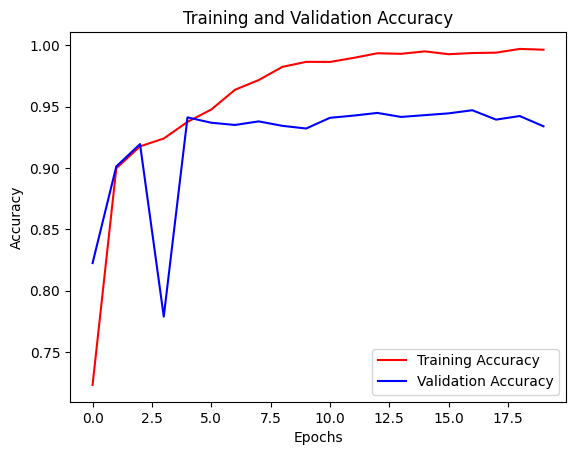

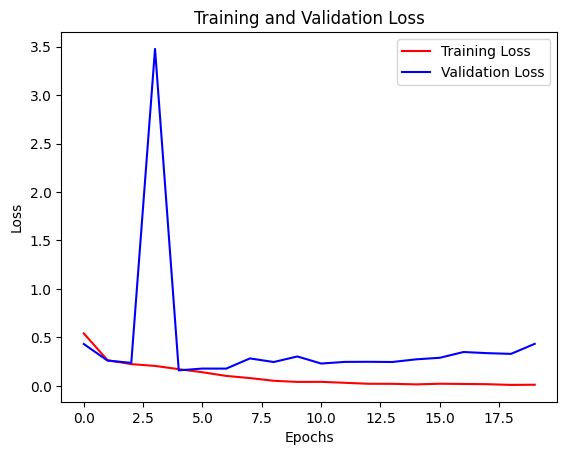

<Figure size 640x480 with 0 Axes>

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

Model Evaluation and Testing

In [ ]:
test_dataset = test_dataset.batch(1)

In [ ]:
model.evaluate(test_dataset)

2757/2757 [==============================] - 24s 4ms/step - loss: 0.4371 - accuracy: 0.9304


[0.4370933175086975, 0.9303590655326843]

In [ ]:
diagnose(model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 12s 12s/step


'U'

In [ ]:
def diagnose(x):
  if(x < 0.5):
    return str('P')
  else:
    return str('U')

1/1 [==============================] - 0s 19ms/step


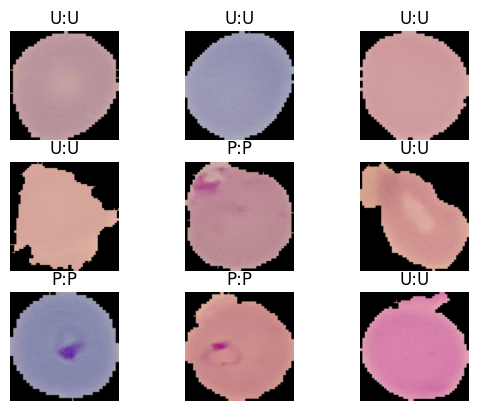

In [ ]:
for i, (image, label) in enumerate(test_dataset.take(9)):

  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[0])
  plt.title(str(diagnose(label.numpy()[0])) + ":" + str(diagnose(model.predict(image)[0][0])))

  plt.axis('off')